# 9. Unsupervised machine learning - Clustering

In this chapter you will find out about unsupervised machine learning, as a method of learning from data that is 'unlabeled', that is it only has known features but no known values or class (see fig.1). The general idea is that the algorithm would be able to classify the data by infering from some underlying hidden patterns. 

<figure>
<img src="https://raw.githubusercontent.com/VALENCEML/eBOOK/main/EN/09/unsup1.png" style="height: 300px;"/> 
<figcaption align = "center"> Figure 1. The difference between supervised and unsupervised learning.</figcaption>
</figure>

Clustering is a form of unsupervised learning where an algorithm is tasked with grouping a set of objects in groups called **clusters** such that objects in the same cluster are more similar to each other than to those in other clusters. 

There are several different clustering algorithms, such as:

* KMeans;
* DBSCAN;
* Agglomerative Hierarchical Clustering;
* Expectation–Maximization (EM) Clustering;
* Mean Shift Clustering. 

Very often it is up to the user to indicate the number of clusters, i.e. that is the most important hyperparameter in clustering. Different algorithms then use different methods to group the data into clusters (e.g. distance between the data points, density of the data points, etc.). 

## 9.1. KMeans Clustering

### 9.1.1. Algorithm

This is one of the most popular and widely used methods for clustering. It divides the data into K different clusters based on the Euclidian (geometrical) distance between the data points. 

It is a simple algorithm which works in the following way:
1. Generate the center points (called **centroids**) of the K clusters randomly.
2. Go through all data points and check which centroid is the closest; assign the data point to that cluster.
3. Calculate a new location for each of the K centroids by calculating the mean of the locations of all data points assigned to that cluster.
4. Calculate the value of the **cost function** for the given clustering. 
5. If the difference between the cost function values in the current and previous iteration is larger than some tolerance $\epsilon$, then return to step 2. Else, return the last clustering.  
OR  
If the maximum number of iterations hasn't been reached, then return to step 2. Else, return the last clustering. 

The final step differs depending on whether the condition to stop the algorithm is to reach some number of maximum iterations, or if the condition is that the value of the cost function converges (i.e. stops changing significantly between iterations). The threshold $\epsilon$ below which change is deemed insignificant is also a hyperparameter defined by the user. 

The algorithm is visualy represented in fig.2., where the redistribution of data points in 3 clusters over 14 iterations is shown. 

<figure>
<img src="https://raw.githubusercontent.com/VALENCEML/eBOOK/main/EN/09/K-means_convergence.gif" style="height: 300px;"/>
<figcaption align = "center"> Figure 2 The steps of the KMeans algorithm (Chire, CC BY-SA 4.0 <https://creativecommons.org/licenses/by-sa/4.0>, via Wikimedia Commons) </figcaption>
</figure>

### 9.1.2. Cost Function

The cost funcion in KMeans is also called **distortion**, and it is the sum of distances between each point and its local centroid.

If _m_ is the number of data points, _x<sup>(i)</sup>_ are the data points, _$\mu$<sub>(i)</sub>_ is the cluster centroid to which data point _x<sup>(i)</sup>_ has been assigned, and $||A-B||^2$ is the distance between two points A and B, then the distortion _J_ is calculated as:

$J=\frac{1}{m}\sum_{i=1}^m ||x^{(i)}-\mu_{(i)}||^2$

By going over steps 2 and 3, the algorithm actually tries to optimize this function _J_, that is is tries to find the best possible distribution of the data points into clusters which will result in the smallest possible value for _J_.

This cost funcion is not convex, which means that if you run the KMeans algorithm on the same data twice, you might not get the same result. The final result is dependent on the initial locations of the centroids, which are selected randomly. That's why it is very important to try the algorithm more times to give it a chance to converge properly and select the best result. 

The other option is to use a special way to select the initial locations of the centroids called k-means++. It will not be explained here, but it is used when calling the KMeans function in sklearn. 

### 9.1.3. Simple Examples

Let's define a few example datasets and test out the KMeans algorithm on them. 

In [29]:
# Import the necessary libraries and modules:
import numpy as np
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

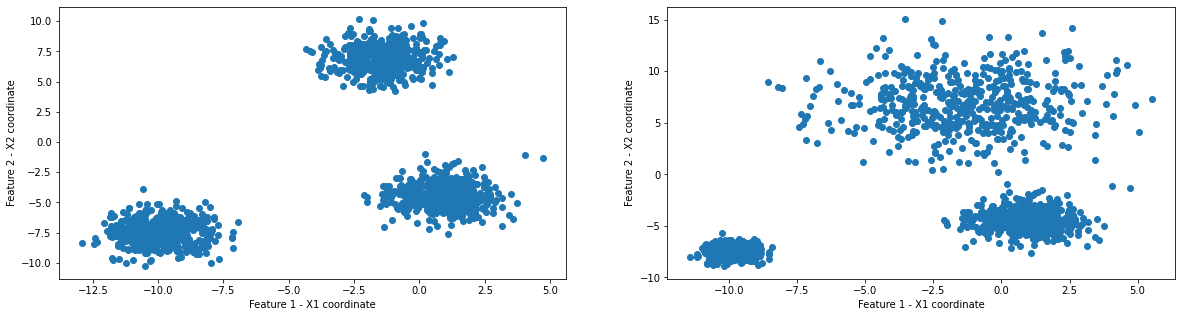

In [30]:
n_samples = 1500 # number of data points
random_state = 100 # seed number for data points generation 
# Generate blobs with similar variances (shapes):
blobs = datasets.make_blobs(n_samples=n_samples,random_state=random_state)
# Generate blobs with different variances (shapes):
varied = datasets.make_blobs(n_samples=n_samples,cluster_std=[1.0, 2.5, 0.5],random_state=random_state)

# Plot the generated datasets:
datsets = {'blobs': blobs,'varied': varied}
plot_nr = 1
plt.figure(figsize=(20, 5))
for key in datsets:
    X, y = datsets[key]
    plt.subplot(1, len(datsets), plot_nr)
    plt.scatter(X[:, 0], X[:, 1])
    plt.xlabel('Feature 1 - X1 coordinate')
    plt.ylabel('Feature 2 - X2 coordinate')
    plot_nr += 1

It seems obvious that there should be 3 clusters in both instances, so let's go with that number.

First let's separate the even blobs into clusters. We do the following things:  
* We retrieve the two-dimensional coordinates of each data point (X) and the cluster they belong in (y). IMPORTANT: The algorithm does not know the clusters of the data points, hence the unsupervised learning.
* We standardize the features with the StandardScaler function, meaning that all data now has zero mean and unit variance. This is an important step in clustering to avoid any problems that may occur because of the shape and distribution of the data.
* We call/initialize the KMeans algorithm. We assign the following arguments:
  * _n__clusters_ is the number of clusters.
  * _init_ is the way we initialize the centroids. We can do it randomly, as given in this example, or we can use k-means++ which selects the initial cluster centroids using sampling based on an empirical probability distribution of the points’ contribution to the overall inertia.
  * _n__init_ is the number of times that the algorithm will try to randomly regenerate the initial centroids before chosing the best case. 
  * _max__iter_ is the number of iterations before the algorithm stops.
* We run the algorithm with kmeans.fit_predict and fit_transform (notice how we only feed the algorithm the X values). 
* We plot the results, where each cluster is in a different color. 

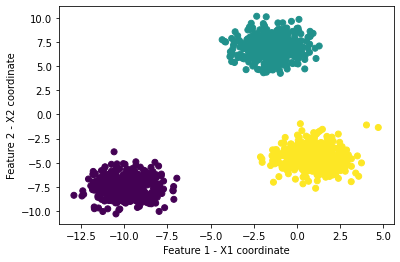

In [31]:
X, y = datsets['blobs'] # retrieve data
scaler = StandardScaler() # standardize data
kmeans = KMeans(n_clusters=3,init='random',n_init=5,max_iter=20) # initialize algorithm
y_pred = kmeans.fit_predict(scaler.fit_transform(X)) # run algorithm
#plot:
plt.scatter(X[:, 0], X[:, 1], c=y_pred) 
plt.xlabel('Feature 1 - X1 coordinate')
plt.ylabel('Feature 2 - X2 coordinate');

Notice how the data is separated into the 3 clusters pretty logically according to our standards. But the question that we will address later is how to determine the number of clusters generally, when we can't visualize the problem. 

Next, let's check what happens when we try to separate the varied shaped data into 3 clusters. We use the same arguments as before, with the exception that this time we put the number of random initializations to be 1. This means that the algorithm will try to separate the data after only 1 attempt of random initialization of the centroids. Run the following code a few times and notice how the clustering is not consistent as it depends on the initial conditions. 

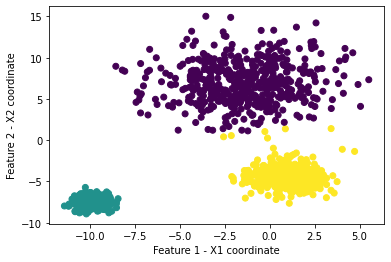

In [32]:
X, y = datsets['varied'] # retrieve data
scaler = StandardScaler() # standardize data
kmeans = KMeans(n_clusters=3,init='random',n_init=1,max_iter=20) # initialize algorithm
y_pred = kmeans.fit_predict(scaler.fit_transform(X)) # run algorithm
# plot:
plt.scatter(X[:, 0], X[:, 1], c=y_pred) 
plt.xlabel('Feature 1 - X1 coordinate')
plt.ylabel('Feature 2 - X2 coordinate');

This can easilly be fixed in several different ways:
* the number of initializations can be higher (as in the previous example), 
* the number of iterations can be higher (although this doesn't always guarantee convergence),
* different initialization technique can be used: k-means++ instead of random. 

Try the example again, but this time by changing the values of these three arguments and observing the results. 

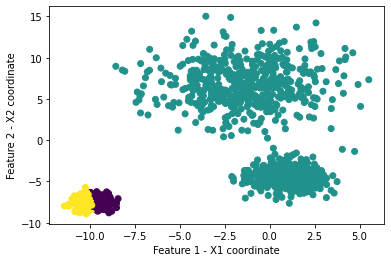

In [33]:
X, y = datsets['varied'] # retrieve data
scaler = StandardScaler() # standardize data

# Try both methods by inserting 0 for 'random' or 1 for 'k-means++' 
# in the 'init' list when calling KMeans: 
init=['random','k-means++'] 
# Try different numbers of initializations:
n_init=1 
# Try different (larger) numbers of maximum iterations:
max_iter=200 

kmeans = KMeans(n_clusters=3,init=init[0],n_init=n_init,max_iter=max_iter) # initialize algorithm
y_pred = kmeans.fit_predict(scaler.fit_transform(X)) # run algorithm
# plot:
plt.scatter(X[:, 0], X[:, 1], c=y_pred) 
plt.xlabel('Feature 1 - X1 coordinate')
plt.ylabel('Feature 2 - X2 coordinate');

Observe that for a single random initialization, sometimes the clusters may not converge properly regardless of the number of iterations. 

### 9.1.4. Determining the number of clusters

If the problem is not simply understandable of visualizable, we cannot always determine the number of clusters easily. A good method to determine the best number of clusters is to use the so called **"elbow method"**. 

The idea behind it is to calculate the distortion value at the end of the clustering for different numbers of clusters. Remember that this value is a representation of the "badness" or the error in clustering, and should be as low as possible. 

If there is a sudden drop in the distortion at a certain number, after which the reduction is slower and linear, then that is the number of clusters that is chosen. The reason is that the number of clusters produces too big a distortion for fewer clusters, and more clusters aren't worth it since the distortion doesn't reduce much anymore.

Let's show this on the previous examples. 

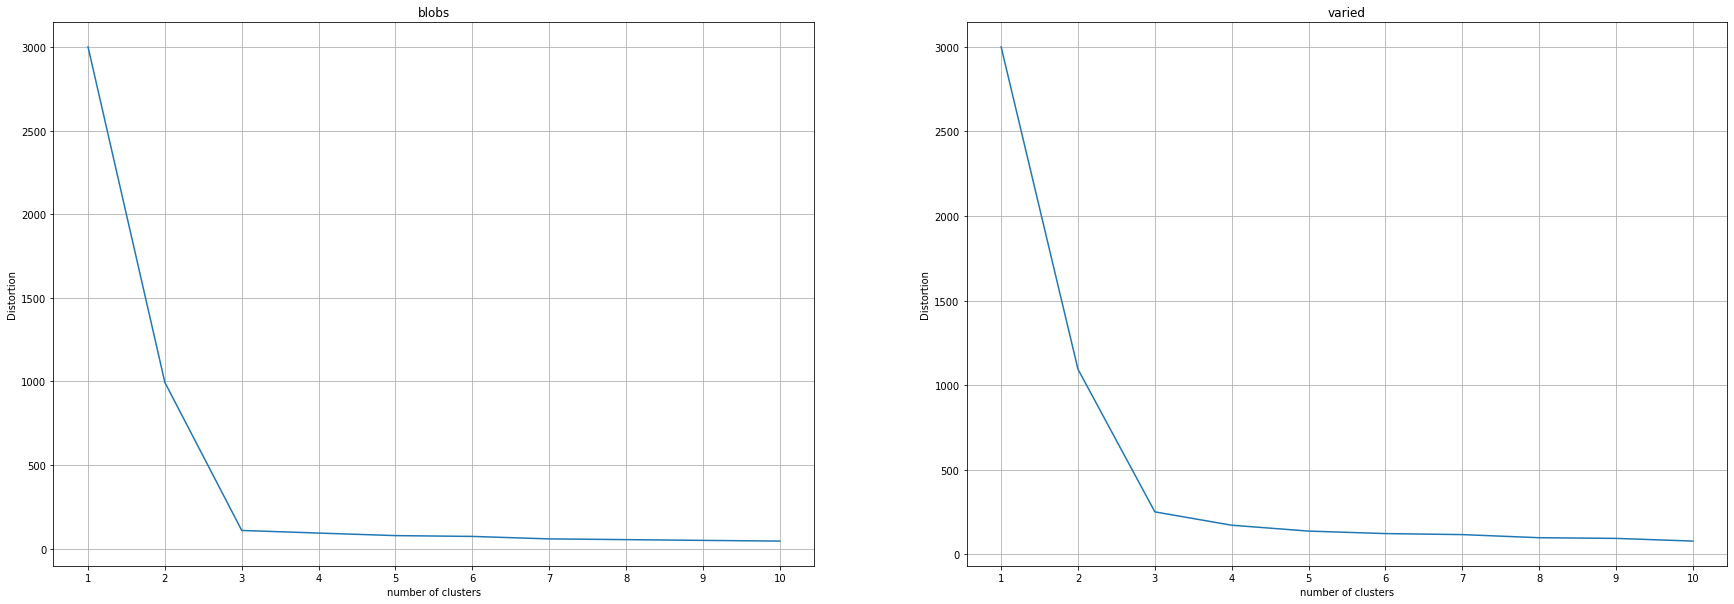

In [39]:
plt.figure(figsize=(30, 10)) # generate an empty figure
plot_nr = 1 # start a counter for the number of plots
max_nr_clusters = 10 # maximum number of clusters

for key in datsets: # for each dataset:
    X, y = datsets[key] # retrieve data
    cost_func = [] # define an empty list to store the values of the distortion
    for nr_clusters in range(1, max_nr_clusters + 1): # for an increasing number of clusters, starting from one:
        scaler = StandardScaler() # standardize data
        kmeans = KMeans(n_clusters=nr_clusters,init='random',n_init=5) # initialize algorithm
        kmeans.fit(scaler.fit_transform(X)) # run algorithm
        cost_func.append(kmeans.inertia_) # calculate inertia (interchangable with distortion)
    # Plot the dependence of the distortion from the number of clusters:
    plt.subplot(1, len(datsets), plot_nr) 
    plt.plot(range(1, 11), cost_func)
    plt.xlabel('number of clusters')
    plt.ylabel('Distortion')
    plt.title(key)
    plt.xticks(range(1, 11))
    plt.grid()
    plot_nr += 1 

It is obvious that the elbow (breaking point) in both cases appears for 3 clusters. Therefore our choice at the beginning, inspired by the look of the data, was correct. 

Of course, this method only serves to give a recommendation about the number of clusters. Any extra information about the problem might help in determining the number of clusters even more than the elbow method. 

### 9.1.5. Limitations of KMeans

KMeans is convinient because it is easy to implement and can be used with large datasets. However, one of its main drawbacks (beside the fact that it is sensitive to the initial cluster centroid locations) is that it performs poorly when the data has some irregular (not sphere-like) shapes. 

Such an example can be seen from the following datasets, shaped like concentrical circles and like crescents. 

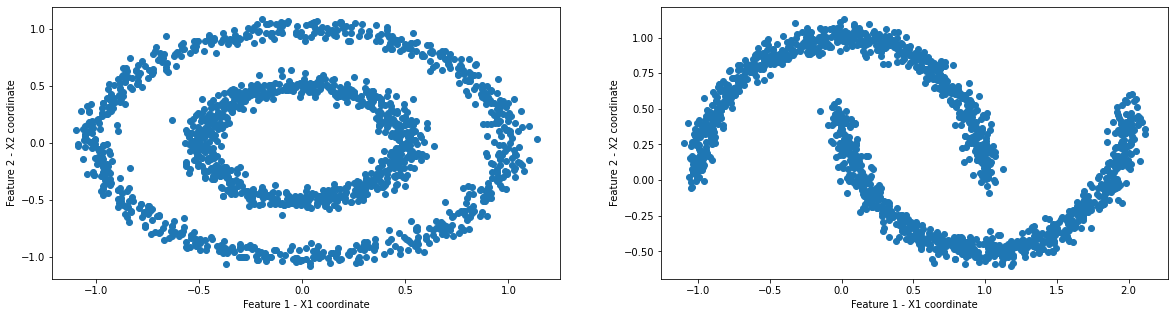

In [40]:
n_samples = 1500 # number of data points
random_state = 100 # seed number for data points generation 
# Generate concentrical circles:
noisy_circles = datasets.make_circles(n_samples=n_samples,factor=.5,noise=.05)
# Generate crescents:
noisy_moons = datasets.make_moons(n_samples=n_samples,noise=.05) 

# Plot the generated datasets:
datsets2 = {'circles': noisy_circles,'crescents': noisy_moons}
plot_nr = 1
plt.figure(figsize=(20, 5))
for key in datsets2:
    X, y = datsets2[key]
    plt.subplot(1, len(datsets2), plot_nr)
    plt.scatter(X[:, 0], X[:, 1])
    plt.xlabel('Feature 1 - X1 coordinate')
    plt.ylabel('Feature 2 - X2 coordinate')
    plot_nr += 1

Let's attempt to divide the data into 2 clusters, expecting them to contain each of the 2 circles in the first example, and each of the 2 crescents in the second example. 

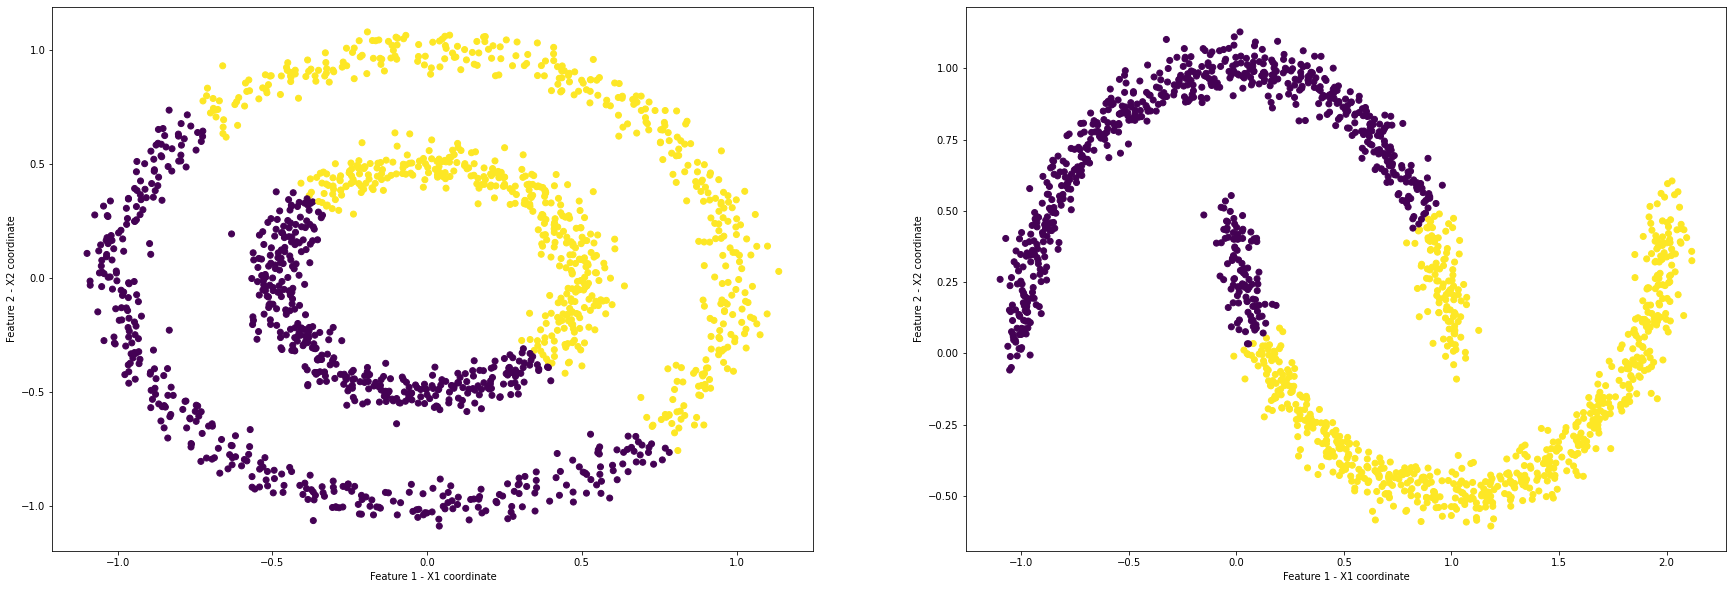

In [41]:
plt.figure(figsize=(30, 10)) # generate an empty figure
plot_nr = 1 # start a counter for the number of plots

for key in datsets2: # for each dataset:
    X, y = datsets2[key] # retrieve data
    scaler = StandardScaler() # standardize data
    kmeans = KMeans(n_clusters=2,init='random',n_init=5,max_iter=200) # initialize algorithm
    y_pred = kmeans.fit_predict(scaler.fit_transform(X)) # run algorithm
    # plot:
    plt.subplot(1, len(datsets2), plot_nr)
    plt.scatter(X[:, 0], X[:, 1], c=y_pred) 
    plt.xlabel('Feature 1 - X1 coordinate')
    plt.ylabel('Feature 2 - X2 coordinate')
    plot_nr += 1

In such cases, other approaches are recommended. For example, **DBSCAN (Density-based spatial clustering of applications with noise)** uses the density of the data points instead of their distances, so would perform better in this example. 

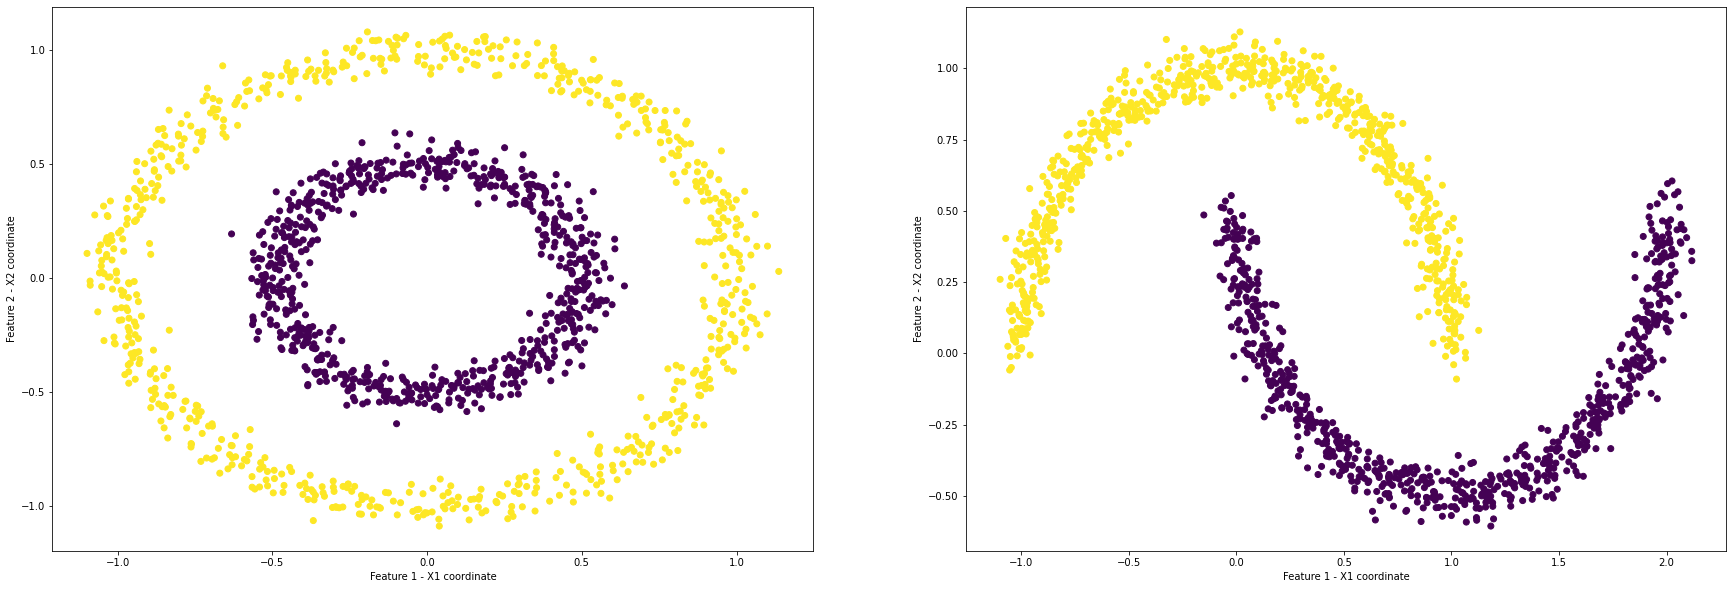

In [42]:
from sklearn.cluster import DBSCAN 

plt.figure(figsize=(30, 10)) # generate an empty figure
plot_nr = 1 # start a counter for the number of plots

for key in datsets2: # for each dataset:
    X, y = datsets2[key] # retrieve data
    scaler = StandardScaler() # standardize data
    dbscan = DBSCAN(eps=0.3,min_samples=10) # initialize algorithm
    y_pred = dbscan.fit_predict(scaler.fit_transform(X)) # run algorithm
    # plot:
    plt.subplot(1, len(datsets2), plot_nr)
    plt.scatter(X[:, 0], X[:, 1], c=y_pred) 
    plt.xlabel('Feature 1 - X1 coordinate')
    plt.ylabel('Feature 2 - X2 coordinate')
    plot_nr += 1

DBSCAN successfully recognized the two shapes, because it is interested in the density as a representation of the grouping of data, instead of their distance (which is obvious if you compare with the results from KMeans on the same datasets). On the other hand, DBSCAN won't work well if the shapes have varying density.

The two hyperparameters we defined for DBSCAN are:
* _eps_ is the maximum distance between two samples for one to be considered as in the neighborhood of the other.
* _min__samples_ is the number of samples in a neighborhood for a point to be considered as a core point.

These hyperparameters are much more difficult to tune than the ones at KMeans because they are more abstract, so although it's more powerful than KMeans, this is a more delicate and difficult algorithm to get right. 

## 9.2. Example of Using KMeans for Clustering Weather Stations According to Climate Characteristics

This example will use a dataset from meteorological (weather) stations in Canada, whose features are the measurements at each station. We will make the clustering according to the types of climate, and then we will visualize the stations geographically to evaluate our approach.

You will need the following libraries:
1. wget -> (conda install -c conda-forge python-wget) for downloading files
2. cartopy -> (conda install -c conda-forge cartopy) for drawing a map
3. PIL -> (conda install -c anaconda pillow)

Dataset information:
<h4 align = "center">
Environment Canada    
Monthly Values for July - 2015	
</h4>
<html>
<head>
<style>
table {
    font-family: arial, sans-serif;
    border-collapse: collapse;
    width: 100%;
}

td, th {
    border: 1px solid #dddddd;
    text-align: left;
    padding: 8px;
}

tr:nth-child(even) {
    background-color: #dddddd;
}
</style>
</head>
<body>

<table>
  <tr>
    <th>Name in the table</th>
    <th>Meaning</th>
  </tr>
  <tr>
    <td><font color = "green"><strong>Stn_Name</font></td>
    <td><font color = "green"><strong>Station Name</font</td>
  </tr>
  <tr>
    <td><font color = "green"><strong>Lat</font></td>
    <td><font color = "green"><strong>Latitude (North+, degrees)</font></td>
  </tr>
  <tr>
    <td><font color = "green"><strong>Long</font></td>
    <td><font color = "green"><strong>Longitude (West - , degrees)</font></td>
  </tr>
  <tr>
    <td>Prov</td>
    <td>Province</td>
  </tr>
  <tr>
    <td>Tm</td>
    <td>Mean Temperature (°C)</td>
  </tr>
  <tr>
    <td>DwTm</td>
    <td>Days without Valid Mean Temperature</td>
  </tr>
  <tr>
    <td>D</td>
    <td>Mean Temperature difference from Normal (1981-2010) (°C)</td>
  </tr>
  <tr>
    <td><font color = "black">Tx</font></td>
    <td><font color = "black">Highest Monthly Maximum Temperature (°C)</font></td>
  </tr>
  <tr>
    <td>DwTx</td>
    <td>Days without Valid Maximum Temperature</td>
  </tr>
  <tr>
    <td><font color = "black">Tn</font></td>
    <td><font color = "black">Lowest Monthly Minimum Temperature (°C)</font></td>
  </tr>
  <tr>
    <td>DwTn</td>
    <td>Days without Valid Minimum Temperature</td>
  </tr>
  <tr>
    <td>S</td>
    <td>Snowfall (cm)</td>
  </tr>
  <tr>
    <td>DwS</td>
    <td>Days without Valid Snowfall</td>
  </tr>
  <tr>
    <td>S%N</td>
    <td>Percent of Normal (1981-2010) Snowfall</td>
  </tr>
  <tr>
    <td><font color = "green"><strong>P</font></td>
    <td><font color = "green"><strong>Total Precipitation (mm)</font></td>
  </tr>
  <tr>
    <td>DwP</td>
    <td>Days without Valid Precipitation</td>
  </tr>
  <tr>
    <td>P%N</td>
    <td>Percent of Normal (1981-2010) Precipitation</td>
  </tr>
  <tr>
    <td>S_G</td>
    <td>Snow on the ground at the end of the month (cm)</td>
  </tr>
  <tr>
    <td>Pd</td>
    <td>Number of days with Precipitation 1.0 mm or more</td>
  </tr>
  <tr>
    <td>BS</td>
    <td>Bright Sunshine (hours)</td>
  </tr>
  <tr>
    <td>DwBS</td>
    <td>Days without Valid Bright Sunshine</td>
  </tr>
  <tr>
    <td>BS%</td>
    <td>Percent of Normal (1981-2010) Bright Sunshine</td>
  </tr>
  <tr>
    <td>HDD</td>
    <td>Degree Days below 18 °C</td>
  </tr>
  <tr>
    <td>CDD</td>
    <td>Degree Days above 18 °C</td>
  </tr>
  <tr>
    <td>Stn_No</td>
    <td>Climate station identifier (first 3 digits indicate   drainage basin, last 4 characters are for sorting alphabetically).</td>
  </tr>
  <tr>
    <td>NA</td>
    <td>Not Available</td>
  </tr>


</table>

</body>
</html>
    
    
Import necessary libraries, download data file: 

In [2]:
import wget
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs
import cartopy

In [3]:
wget.download('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/weather-stations20140101-20141231.csv')

'weather-stations20140101-20141231.csv'

In [4]:
data = pd.read_csv('weather-stations20140101-20141231.csv')

In [5]:
data.head()

,Stn_Name,Lat,Long,Prov,Tm,DwTm,D,Tx,DwTx,Tn,...,DwP,P%N,S_G,Pd,BS,DwBS,BS%,HDD,CDD,Stn_No
0,CHEMAINUS,48.935,-123.742,BC,8.2,0.0,NaN,13.5,0.0,1.0,...,0.0,NaN,0.0,12.0,NaN,NaN,NaN,273.3,0.0,1011500
1,COWICHAN LAKE FORESTRY,48.824,-124.133,BC,7.0,0.0,3.0,15.0,0.0,-3.0,...,0.0,104.0,0.0,12.0,NaN,NaN,NaN,307.0,0.0,1012040
2,LAKE COWICHAN,48.829,-124.052,BC,6.8,13.0,2.8,16.0,9.0,-2.5,...,9.0,NaN,NaN,11.0,NaN,NaN,NaN,168.1,0.0,1012055
3,DISCOVERY ISLAND,48.425,-123.226,BC,NaN,NaN,NaN,12.5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1012475
4,DUNCAN KELVIN CREEK,48.735,-123.728,BC,7.7,2.0,3.4,14.5,2.0,-1.0,...,2.0,NaN,NaN,11.0,NaN,NaN,NaN,267.7,0.0,1012573


Removing empty data (NaN):

In [6]:
data.drop(columns=['BS', 'DwBS', 'BS%', 'D', 'S', 'DwS', 'S%N', 'P%N', 'S_G'], inplace=True)
data.dropna(axis='rows', inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1143 entries, 0 to 1340
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Stn_Name  1143 non-null   object 
 1   Lat       1143 non-null   float64
 2   Long      1143 non-null   float64
 3   Prov      1143 non-null   object 
 4   Tm        1143 non-null   float64
 5   DwTm      1143 non-null   float64
 6   Tx        1143 non-null   float64
 7   DwTx      1143 non-null   float64
 8   Tn        1143 non-null   float64
 9   DwTn      1143 non-null   float64
 10  P         1143 non-null   float64
 11  DwP       1143 non-null   float64
 12  Pd        1143 non-null   float64
 13  HDD       1143 non-null   float64
 14  CDD       1143 non-null   float64
 15  Stn_No    1143 non-null   object 
dtypes: float64(13), object(3)
memory usage: 151.8+ KB


In [8]:
data.describe()

,Lat,Long,Tm,DwTm,Tx,DwTx,Tn,DwTn,P,DwP,Pd,HDD,CDD
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.0
mean,50.950539,-97.471895,-11.535696,2.270341,3.082677,1.846019,-25.880490,1.834646,50.091426,2.524934,7.446194,757.104549,0.0
std,5.757043,23.136281,10.328233,4.964097,8.684320,4.208333,12.654909,4.314045,62.909236,4.666180,4.762158,309.067992,0.0
min,42.043000,-140.868000,-36.400000,0.000000,-28.900000,0.000000,-49.700000,0.000000,0.000000,0.000000,0.000000,26.000000,0.0
25%,46.942000,-117.165000,-17.800000,0.000000,-3.400000,0.000000,-35.000000,0.000000,13.000000,0.000000,4.000000,528.250000,0.0
50%,49.872000,-104.008000,-13.400000,0.000000,3.300000,0.000000,-29.000000,0.000000,26.400000,0.000000,7.000000,797.200000,0.0
75%,53.162500,-74.311000,-4.800000,2.000000,10.350000,1.000000,-21.000000,1.000000,59.650000,3.000000,11.000000,966.400000,0.0
max,82.500000,-52.753000,9.500000,27.000000,22.000000,27.000000,5.300000,27.000000,516.800000,27.000000,28.000000,1523.400000,0.0


In [9]:
coords = data[['Long', 'Lat']]

Removing all columns not relevant for the climate:

In [10]:
data.drop(columns=['Long', 'Lat', 'Stn_No', 'Stn_Name', 'Prov'], inplace=True)
data.head()

,Tm,DwTm,Tx,DwTx,Tn,DwTn,P,DwP,Pd,HDD,CDD
0,8.2,0.0,13.5,0.0,1.0,0.0,178.8,0.0,12.0,273.3,0.0
1,7.0,0.0,15.0,0.0,-3.0,0.0,258.6,0.0,12.0,307.0,0.0
2,6.8,13.0,16.0,9.0,-2.5,9.0,264.6,9.0,11.0,168.1,0.0
4,7.7,2.0,14.5,2.0,-1.0,2.0,168.4,2.0,11.0,267.7,0.0
5,8.8,0.0,13.1,0.0,1.9,0.0,81.0,8.0,12.0,258.6,0.0


Geographical distribution of the weather stations:

C:\Users\gorja\Anaconda3\lib\site-packages\cartopy\io\__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/50m/physical/ne_50m_land.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
C:\Users\gorja\Anaconda3\lib\site-packages\cartopy\io\__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/50m/physical/ne_50m_ocean.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
C:\Users\gorja\Anaconda3\lib\site-packages\cartopy\io\__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/50m/physical/ne_50m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
C:\Users\gorja\Anaconda3\lib\site-packages\cartopy\io\__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/50m/physical/ne_50m_lakes.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
C:\Users\gorja\Anaconda3\lib\site-packages\cartopy\io\__init__.py:260: DownloadWa

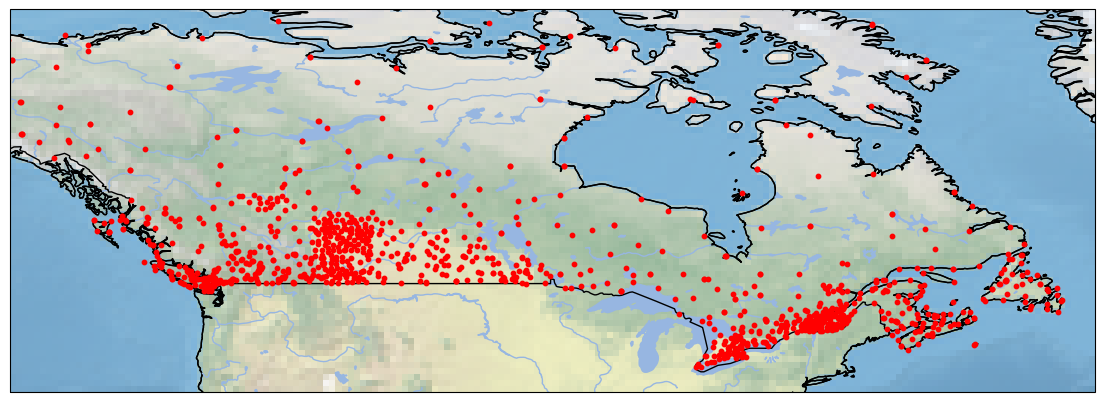

In [11]:
extent = [-140, -50, 40, 65]

plt.figure(figsize=(14, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.stock_img()
ax.set_extent(extent)
ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.LAKES)
ax.add_feature(cartopy.feature.RIVERS)
ax.add_feature(cartopy.feature.BORDERS)
ax.scatter(coords['Long'], coords['Lat'], transform=ccrs.PlateCarree(), color='r', s=10)
plt.show()

KMeans clustering: 

C:\Users\gorja\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  "KMeans is known to have a memory leak on Windows "


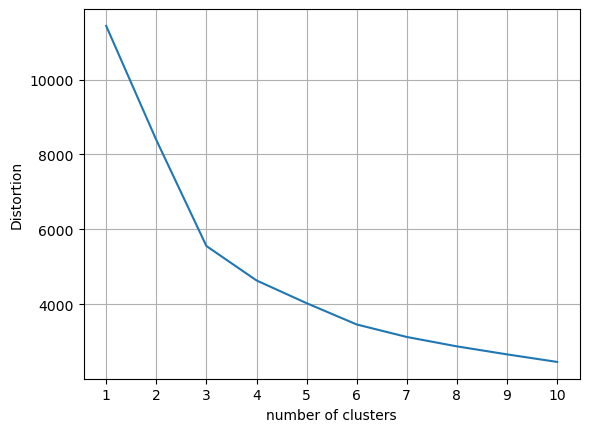

In [12]:
max_nr_clusters = 10
cost_func = []
for nr_clusters in range(1, max_nr_clusters + 1):
    scaler = StandardScaler()
    kmeans = KMeans(n_clusters=nr_clusters, init='k-means++', n_init=20)
    kmeans.fit(scaler.fit_transform(data))
    cost_func.append(kmeans.inertia_)

plt.plot(range(1, max_nr_clusters + 1), cost_func)
plt.xlabel('number of clusters')
plt.ylabel('Distortion')
plt.xticks(range(1,  max_nr_clusters + 1))
plt.grid()

According to the elbow method, we might choose 3 or 6 clusters. Let's go with 3. 

In [17]:
scaler = StandardScaler()
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=20)
y_pred = kmeans.fit_predict(scaler.fit_transform(data))

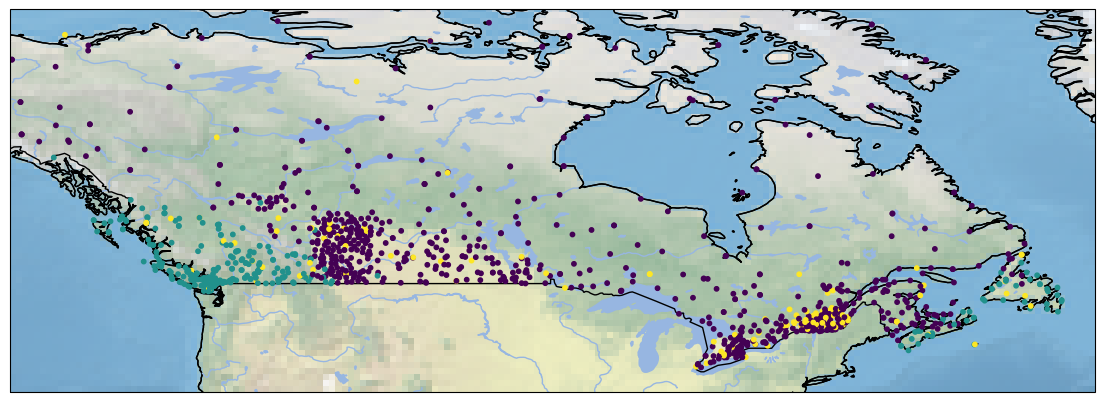

In [18]:
extent = [-140, -50, 40, 65]

plt.figure(figsize=(14, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.stock_img()
ax.set_extent(extent)
ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.LAKES)
ax.add_feature(cartopy.feature.RIVERS)
ax.add_feature(cartopy.feature.BORDERS)
ax.scatter(coords['Long'], coords['Lat'], transform=ccrs.PlateCarree(), c=y_pred, s=10)
plt.show()

For 3 clusters, if we ignore the stations in the north of Canada, we can see that the clustering according to the weather features actually generates clusters which are distributed according to the station's proximity to an ocean. 

This makes some sence, but perhaps trying the clustering with a carefully tuned DBSCAN might yield better results. 

Try a different number of clusters as well. 

## 9.3. Applications of Clustering

KMeans clustering is rather easy to apply to even large data sets, so it has a lot of applications. It has been successfully used in clustering users in market segmentation, classification of astronomical objects, and image processing in computer vision, among many other domains. It is also often used as a preprocessing step for other algorithms.

Here we will demonstrate the use of KMeans clustering for color quantization. This is the process of reducing the color palette of an image to a fixed number of colors _k_. We do this by taking each pixel of the picture as a data point, and its RGB values as features. Then we separate the pixels into _k_ clusters using KMeans, and to each pixel we assign a new color - the color of its cluster centroid. 

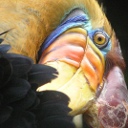

Original pixel RGB values:
 [[[219 180 103]
  [230 185 116]
  [226 186 110]
  ...
  [ 14  15  13]
  [ 13  15  12]
  [ 12  14  12]]

 [[230 193 119]
  [224 192 120]
  [226 192 124]
  ...
  [ 16  16  13]
  [ 14  15  10]
  [ 11  14   9]]

 [[228 191 123]
  [228 191 121]
  [220 185 118]
  ...
  [ 14  16  13]
  [ 13  13  11]
  [ 11  15  10]]

 ...

 [[ 15  18  16]
  [ 18  21  18]
  [ 18  19  16]
  ...
  [ 81  45  45]
  [ 70  43  35]
  [ 72  51  43]]

 [[ 16  17  17]
  [ 17  18  19]
  [ 20  19  20]
  ...
  [ 80  38  40]
  [ 68  39  40]
  [ 59  43  42]]

 [[ 15  19  19]
  [ 20  20  18]
  [ 18  19  17]
  ...
  [ 65  43  39]
  [ 58  37  38]
  [ 52  39  34]]]
Number of pixels (rows): 16384
Number of colors (columns)  3
Data:
 [[0.85882353 0.70588235 0.40392157]
 [0.90196078 0.7254902  0.45490196]
 [0.88627451 0.72941176 0.43137255]
 ...
 [0.25490196 0.16862745 0.15294118]
 [0.22745098 0.14509804 0.14901961]
 [0.20392157 0.15294118 0.13333333]]


In [3]:
# Import libraries:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.io import loadmat
from IPython.display import Image, display

display(Image(filename='bird_small.png')) # show picture
image_data = loadmat('bird_small.mat') # load RGB values of the pixels of the picture
A = image_data['A']
print ("Original pixel RGB values:\n",A)

A = A / 255. # normalize value ranges
X = np.reshape(A, (A.shape[0] * A.shape[1], A.shape[2])) # reshape the array

print ("Number of pixels (rows):",np.size(X,axis=0))
print ("Number of colors (columns) ",np.size(X,axis=1))
print ("Data:\n",X)

Now we have the data in the array X representing all pixel values with a number between 0 and 1. Notice that there are 16384 pixels (resolution 128x128), and each pixel has 3 colors (red, green, and blue hue).

Next, we use KMeans to separate the pixels into 16 clusters according to the similarity of their colors. After that, each pixel's color is replaced with the color of its cluster centroid.  

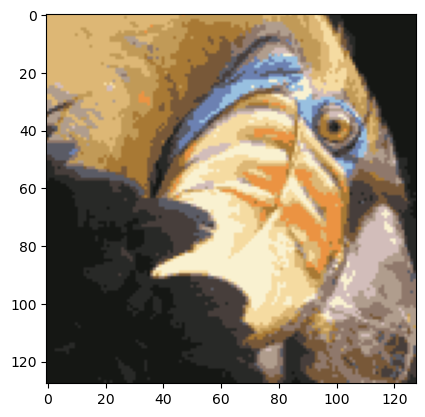

In [7]:
n_clusters = 16 # define number of clusters

# Run the algorithm:
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init=5) 
y_pred = kmeans.fit_predict(X)

# Recolor each pixel with its cluster centroid color and regenerate and show the new image: 
X_recovered = kmeans.cluster_centers_[y_pred] 
X_recovered = np.reshape(X_recovered, (A.shape[0], A.shape[1], A.shape[2]))
plt.imshow(X_recovered);

The picture now has as many colors as there are clusters. The image is still recognizable, but it contains far fewer colors than the original and its size and memory demands are thus reduced.

Try reclustering and regenerating the picture with different numbers of clusters. 